<a href="https://colab.research.google.com/github/kunalavghade/Digital_Signal_Processing/blob/main/SCE/Musical_Note.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Identify Musical note and display scale and frequency**

## Import Lib

In [10]:
import wave
import struct
import os

## frequency database

In [19]:
note=0
name = np.array(["C0","C#0","D0","D#0","E0","F0","F#0","G0","G#0","A0","A#0","B0","C1","C#1","D1","D#1","E1","F1","F#1","G1","G#1","A1","A#1","B1","C2","C#2","D2","D#2","E2","F2","F#2","G2","G2#","A2","A2#","B2","C3","C3#","D3","D3#","E3","F3","F3#","G3","G3#","A3","A3#","B3","C4","C4#","D4","D4#","E4","F4","F4#","G4","G4#","A4","A4#","B4","C5","C5#","D5","D5#","E5","F5","F5#","G5","G5#","A5","A5#","B5","C6","C6#","D6","D6#","E6","F6","F6#","G6","G6#","A6","A6#","B6","C7","C7#","D7","D7#","E7","F7","F7#","G7","G7#","A7","A7#","B7","C8","C8#","D8","D8#","E8","F8","F8#","G8","G8#","A8","A8#","B8","Beyond B8"])
frequencies = np.array([16.35,17.32,18.35,19.45,20.60,21.83,23.12,24.50,25.96	,27.50	,29.14	,30.87	,32.70	,34.65	,36.71	,38.89	,41.20	,43.65	,46.25	,49.00	,51.91	,55.00	,58.27	,61.74	,65.41	,69.30	,73.42	,77.78	,82.41	,87.31	,92.50	,98.00	,103.83	,110.00	,116.54	,123.47	,130.81	,138.59	,146.83	,155.56	,164.81	,174.61	,185.00	,196.00	,207.65	,220.00	,233.08	,246.94	,261.63	,277.18	,293.66	,311.13	,329.63	,349.23	,369.99	,392.00	,415.30	,440.00	,466.16	,493.88	,523.25	,554.37	,587.33	,622.25	,659.26	,698.46	,739.99	,783.99	,830.61	,880.00	,932.33	,987.77	,1046.50	,1108.73	,1174.66	,1244.51	,1318.51	,1396.91	,1479.98	,1567.98	,1661.22	,1760.00	,1864.66	,1975.53	,2093.00	,2217.46	,2349.32	,2489.02	,2637.02	,2793.83	,2959.96	,3135.96	,3322.44	,3520.00	,3729.31	,3951.07	,4186.01	,4434.92	,4698.64	,4978.03	,5274.04	,5587.65	,5919.91	,6271.93	,6644.88	,7040.00	,7458.62	,7902.13,8000])
	

## Import audio file

In [11]:
path = os.getcwd()
file_name = path + "/drive/MyDrive/Colab Notebooks/wav files/c6.wav"
audio_file = wave.open(file_name)

## Conver audio into numpy array 

In [14]:
file_length = audio_file.getnframes()
f_s = audio_file.getframerate() #sampling Freq
sound = np.zeros(file_length) #blank array

for i in range(file_length):
  wdata=audio_file.readframes(1)
  data=struct.unpack("<h",wdata)
  sound[i] = int(data[0])

## Dislay Scale of Audio

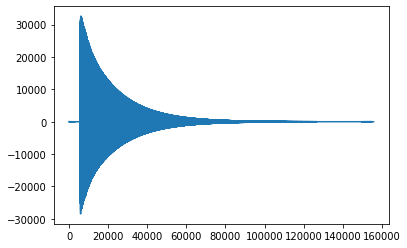

In [15]:
import matplotlib.pyplot as plt
plt.plot(sound)
plt.show()

## Scaling to 0-1

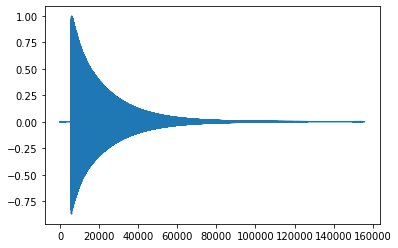

In [16]:
sound=np.divide(sound,float(2**15))
counter = audio_file.getnchannels() #number of channels mono/sterio
plt.plot(sound)
plt.show()

## Frequecy Speactrum of signal

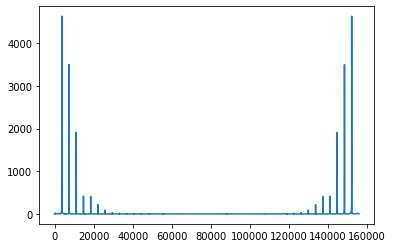

In [17]:
fourier = np.fft.fft(sound)
fourier = np.absolute(fourier)
imax=np.argmax(fourier[0:int(file_length/2)]) #index of max element
		
plt.plot(fourier)
plt.show()

## Peak Detection

In [18]:
i_begin = -1
threshold = 0.3 * fourier[imax]
for i in range (0,imax+100):
	if fourier[i] >= threshold:
		if(i_begin==-1):
			i_begin = i				
	if(i_begin!=-1 and fourier[i]<threshold):
		break
i_end = i
imax = np.argmax(fourier[0:i_end+100])
	
freq=(imax*f_s)/(file_length*counter)

## searching for matched frequencies

In [20]:
for i in range(0,frequencies.size-1):
		if(freq<frequencies[0]):
			note=name[0]
			break
		if(freq>frequencies[-1]):
			note=name[-1]
			break
		if freq>=frequencies[i] and frequencies[i+1]>=freq :
			if freq-frequencies[i]<(frequencies[i+1]-frequencies[i])/2 :
				note=name[i]
			else :
				note=name[i+1]
			break		

In [22]:
print("Detected Note = " + str(note))

Detected Note = C6
